In [1]:
%load_ext autoreload
%autoreload 2

In [87]:
from lv import LV_oscillations

import matplotlib.pyplot as plt
import numpy as np

from flux import *
from xsec import *

from scipy.integrate import quad
from scipy.interpolate import interp1d

def sci_notation(number, sig_fig=1):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return a + r" \times 10^{%s}"%str(b)

In [77]:
# Possible Baselines

# ICECUBE

# Radius of earth
R_earth = 6371.0 # km

# Chicago latitude
lat = 41.88

# Baseline, approx sphere
alpha = ((90 - lat)/2)*np.pi/180
ICECUBE_BASELINE = np.sqrt(2*R_earth**2*(1 - np.cos((90+lat)*np.pi/180)))*1e3 # meters

# Others
PONE_BASELINE = 1758*1.60934*1e3
KM3NeT_BASELINE = 4427*1.60934*1e3

PONE_BASELINE/1e6, KM3NeT_BASELINE/1e6, ICECUBE_BASELINE/1e6

(2.82921972, 7.12454818, 11.634962593570254)

In [78]:
# 500 mega-tonne mass, baseline
MASS = 500e6

# density of water
DENSITY = 1 # t / m^3

VOLUME = MASS / DENSITY
RADIUS = np.power(VOLUME/((4./3.)*np.pi), 1./3.)
Emuon = 5e3

# Unpolarized
P = 0

In [79]:
# lorentz violation parameters
aeu=0
aet=0
aut=1e-22*1e9
ceu=0
cet=0
cut=0

In [80]:
Nbaselines = 500
Nenergies = 500
baselines = np.logspace(1,4.1,Nbaselines)*1e3
#np.logspace(0, np.log10(6.371*2), Nbaselines)*1e6
energies = np.logspace(-1,3,Nenergies)*1e9
#np.logspace(np.log10(Emuon/10), np.log10(Emuon), Nenergies+1)[:-1]

LV_cases = []
for baseline in baselines:
    LV_case = LV_oscillations(energies, baseline, 1,
                              aeu = aeu, aet = aet, aut = aut,
                              ceu = ceu, cet = cet, cut = cut)
    LV_cases.append(LV_case)

In [81]:
alpha = "mu"
beta = "mu"
osc_probs = np.zeros((Nbaselines,Nenergies))
for ibaseline,LV_case in enumerate(LV_cases):
    osc_probs[ibaseline,:] = LV_case.get_oscillation_probability(alpha, beta)


Text(10, 15.848931924611133, '$c^{\\rm TT}_{\\mu \\tau} = 0$')

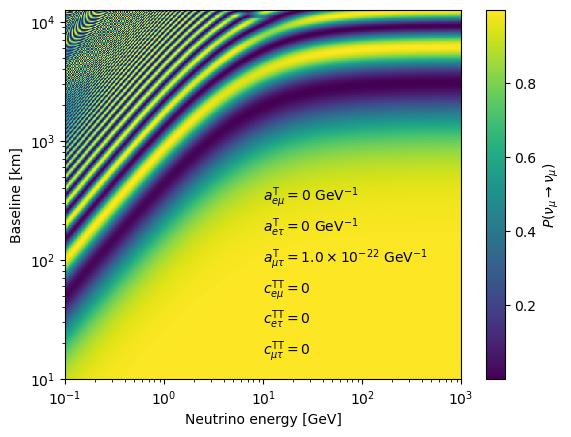

In [100]:
plt.pcolormesh(energies/1e9,baselines/1e3,osc_probs)
plt.loglog()
c = plt.colorbar()
plt.xlabel(r"Neutrino energy [GeV]")
plt.ylabel(r"Baseline [km]")
c.set_label(r"$P(\nu_\mu \to \nu_\mu)$")
text_heights = np.linspace(1.2,2.5,6)
plt.text(10,10**text_heights[5],r"$a^{\rm T}_{e \mu} = %s~{\rm GeV}^{-1}$"%(sci_notation(aeu/1e9) if aeu>0 else "0"))
plt.text(10,10**text_heights[4],r"$a^{\rm T}_{e \tau} = %s~{\rm GeV}^{-1}$"%(sci_notation(aet/1e9) if aet>0 else "0"))
plt.text(10,10**text_heights[3],r"$a^{\rm T}_{\mu \tau} = %s~{\rm GeV}^{-1}$"%(sci_notation(aut/1e9) if aut>0 else "0"))
plt.text(10,10**text_heights[2],r"$c^{\rm TT}_{e \mu} = %s$"%(sci_notation(ceu) if ceu>0 else "0"))
plt.text(10,10**text_heights[1],r"$c^{\rm TT}_{e \tau} = %s$"%(sci_notation(cet) if cet>0 else "0"))
plt.text(10,10**text_heights[0],r"$c^{\rm TT}_{\mu \tau} = %s$"%(sci_notation(cut) if cut>0 else "0"))